In [5]:
import numpy as np

In [6]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [7]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [8]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array([0, 0, 0, ..., 9, 9, 9], dtype=int8),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  'pixel52',
  'p

In [10]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [11]:
y.shape

(70000,)

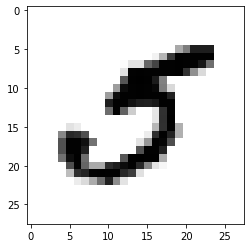

In [14]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.show()

In [15]:
y[36000]

5

In [16]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [17]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [18]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [19]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
sgd_clf.predict([some_digit])

array([False])

In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9507, 0.8981, 0.9688])

In [24]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [25]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9098 , 0.90905, 0.9101 ])

In [26]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[52467,  2112],
       [ 1536,  3885]])

In [28]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.647823911955978

In [29]:
recall_score(y_train_5, y_train_pred)

0.7166574432761483

In [30]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.6805044666316342

In [31]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-3173.28866399])

In [32]:
threshold = -10000
y_some_digit_pred = (y_scores > threshold)

In [33]:
y_some_digit_pred

array([ True])

In [34]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [35]:
y_some_digit_pred

array([False])

In [36]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [37]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [38]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

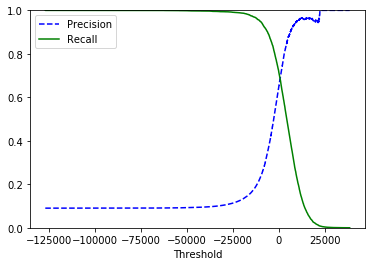

In [39]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [49]:
y_train_pred_90 = (y_scores > 6000)

In [50]:
precision_score(y_train_5, y_train_pred_90)

0.8930842607313195

In [51]:
recall_score(y_train_5, y_train_pred_90)

0.41449916989485336

In [55]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [56]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

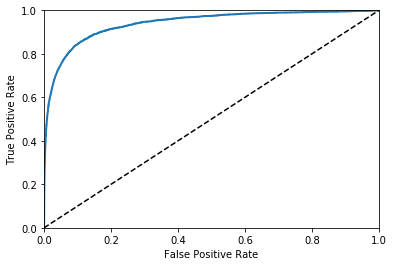

In [57]:
plot_roc_curve(fpr, tpr)
plt.show()

In [58]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9398994721240964

In [60]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [61]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds = roc_curve(y_train_5, y_scores_forest)

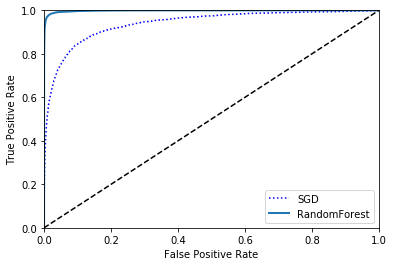

In [63]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, "RandomForest")
plt.legend(loc='lower right')
plt.show()

In [64]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983579934778654

In [67]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [68]:
precision_score(y_train_5, y_train_pred_forest)

0.9896950578338591

In [69]:
recall_score(y_train_5, y_train_pred_forest)

0.86810551558753

In [71]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [72]:
sgd_clf.predict([some_digit])

array([5], dtype=int8)

In [73]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [74]:
some_digit_scores

array([[  2074.75489783, -18481.57995745,  -7423.03654768,
         -1613.93161791, -12500.18529847,   4197.58976932,
        -28048.4419788 , -12675.47439553,  -7131.49111053,
        -16991.11042636]])

In [75]:
np.argmax(some_digit_scores)

5

In [76]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [77]:
sgd_clf.classes_[5]

5

In [78]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=42, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   n_jobs=None)

In [79]:
ovo_clf.predict([some_digit])

array([5], dtype=int8)

In [80]:
len(ovo_clf.estimators_)

45

In [81]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [82]:
forest_clf.predict([some_digit])

array([5], dtype=int8)

In [83]:
forest_clf.predict_proba([some_digit])

array([[0.02, 0.02, 0.  , 0.05, 0.  , 0.9 , 0.  , 0.01, 0.  , 0.  ]])

In [84]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87942412, 0.88579429, 0.86738011])

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.89267147, 0.90229511, 0.8993349 ])

In [86]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [87]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [88]:
conf_mx

array([[5589,    0,   15,    8,    9,   38,   30,    4,  229,    1],
       [   0, 6418,   41,   22,    3,   40,    4,    7,  199,    8],
       [  24,   25, 5219,   89,   70,   23,   73,   41,  385,    9],
       [  30,   21,  111, 5227,    0,  203,   28,   44,  398,   69],
       [  13,   14,   36,   11, 5205,    8,   38,   14,  345,  158],
       [  27,   16,   26,  152,   52, 4448,   87,   16,  537,   60],
       [  32,   17,   41,    2,   43,   92, 5548,    6,  137,    0],
       [  20,   13,   50,   22,   49,   13,    3, 5699,  187,  209],
       [  16,   60,   43,   90,    3,  124,   31,    6, 5436,   42],
       [  23,   21,   28,   62,  124,   32,    1,  188,  373, 5097]])

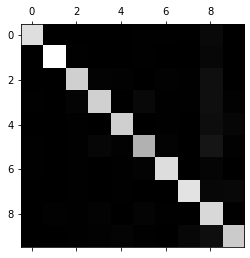

In [89]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [90]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

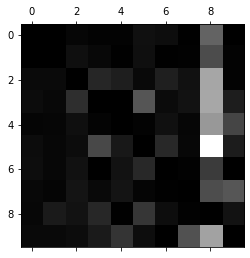

In [92]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

In [96]:
import matplotlib as mpl

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

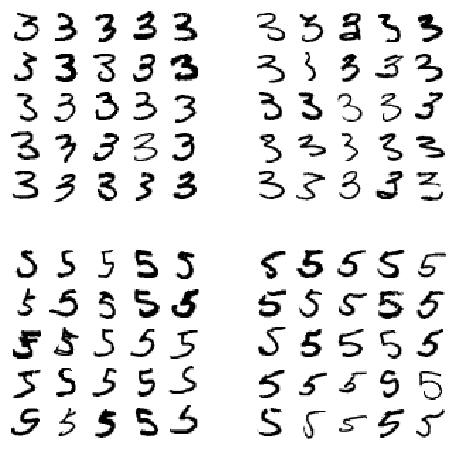

In [97]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [99]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [100]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")

In [102]:
noise_train = np.random.randint(0, 100, (len(X_train), 784))
noise_test = np.random.randint(0, 100, (len(X_test), 784))
X_train_mod = X_train + noise_train
X_test_mod = X_test + noise_test
y_train_mod = X_train
y_test_mod = X_test

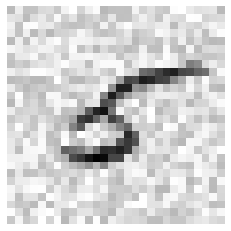

In [105]:
some_index = 6000
plot_digit(X_test_mod[some_index])

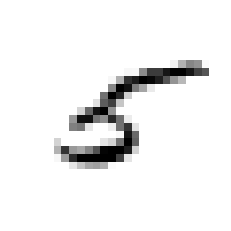

In [106]:
plot_digit(X_test[some_index])

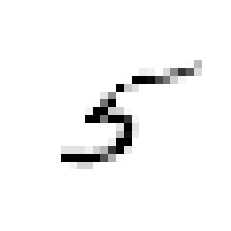

In [108]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

### Exercise 1

In [110]:
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier()
param_grid = [
    {'weights': ['uniform', 'distance'], 'n_neighbors': [3, 4, 5]}
]
knn_grid_cv = GridSearchCV(knn_clf, param_grid, cv=3)
knn_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [112]:
from sklearn.metrics import accuracy_score

best_estimator = knn_grid_cv.best_estimator_
y_test_pred = best_estimator.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9714

### Exercise 2

Pending fix, it's running too long and seems not complete at all, why?

In [120]:
from scipy.ndimage.interpolation import shift

directions = {'up': [-1, 0], 'down': [1, 0], 'left': [0, -1], 'right': [0, 1]}

def shift_image_by_one_pixel(image, direction):
    return shift(image, directions[direction], cval=0)
    
def expand_dataset(X, y):
    X_copy = X.copy()
    y_copy = y.copy()
    for x, y in zip(X, y):
        for d in directions.keys():
            X_copy += shift_image_by_one_pixel(x.reshape(28, 28), d).reshape(-1, 784)
            y_copy += y
        
    return X_copy, y_copy

best_estimator.fit(expand_dataset(X_train, y_train))
y_test_pred = best_estimator.predict(X_test)
accuracy_score(y_test, y_test_pred)

TypeError: fit() missing 1 required positional argument: 'y'

### Exercise 3

Pending

In [ ]:
kaggle competitions download -c titanic

### Exercise 4

Pending